In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import re

In [6]:
d = pd.read_csv('H:/Documents/Training/Thinkful/titanic_train.csv')
d.columns = pd.Series(d.columns).str.lower()
d = d.loc[d.fare>=0]

## Section 1: Plotting one variable (ticket fare) four ways

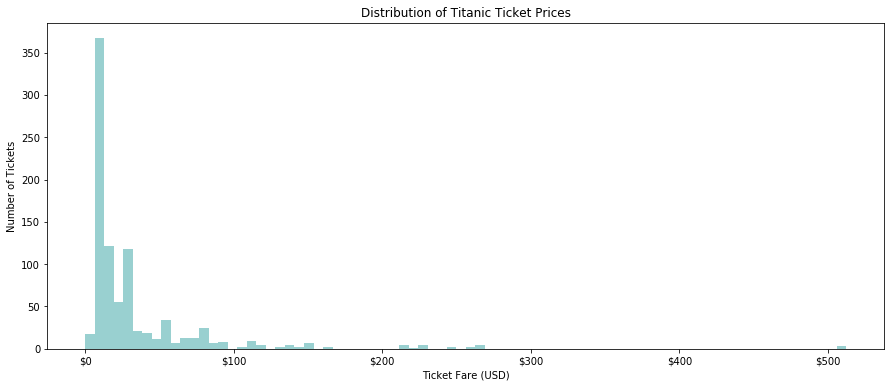

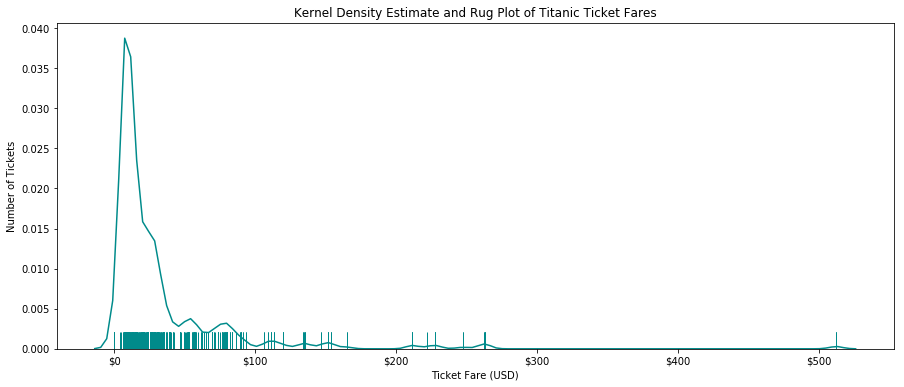

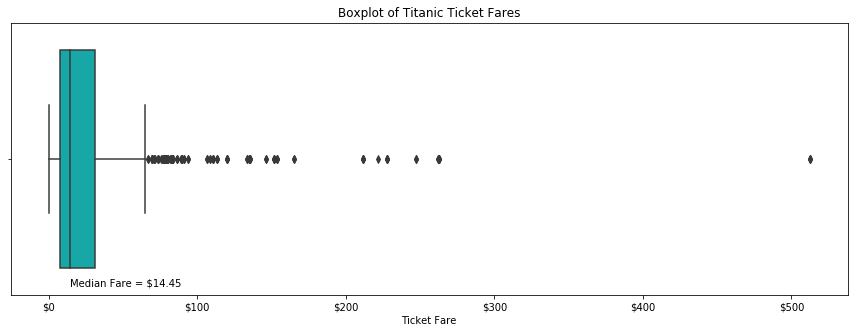

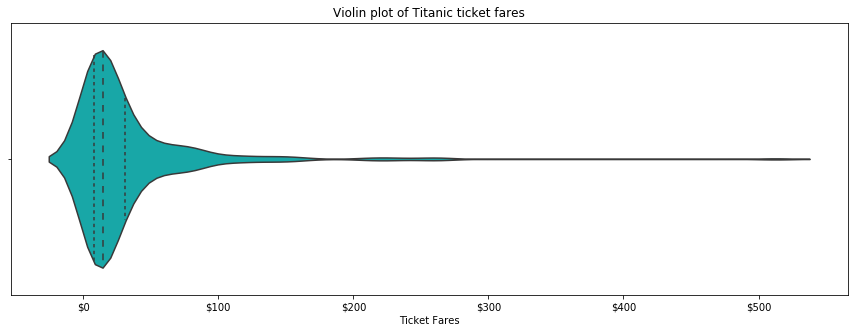

In [7]:
formatter = ticker.FormatStrFormatter('$%1.0f')

# ------------------------Plot 1: Histogram
sns.distplot(d.fare, kde=False, rug=False, bins=80, color='darkcyan')

fig = plt.gcf()
fig.set_size_inches(15, 6)

ax = plt.gca()
ax.xaxis.set_major_formatter(formatter)

plt.title('Distribution of Titanic Ticket Prices')
plt.xlabel('Ticket Fare (USD)')
plt.ylabel('Number of Tickets')
    
plt.show()

# ------------------------Plot 2: KDE and Rug Plot
ax = sns.distplot(d.fare, hist=False, rug=True, bins=80, color='darkcyan')

fig = plt.gcf()
fig.set_size_inches(15, 6)

ax.xaxis.set_major_formatter(formatter)

plt.title('Kernel Density Estimate and Rug Plot of Titanic Ticket Fares')
plt.xlabel('Ticket Fare (USD)')
plt.ylabel('Number of Tickets')
    
plt.show()

# ------------------------Plot 3: Boxplot
fmed = np.median(d.fare)

ax = sns.boxplot(d.fare, color='c')

# Labels
ax.text(fmed, max(ax.get_ylim())-0.03, 'Median Fare = ${0}'.format(np.around(fmed, 2)))
plt.title('Boxplot of Titanic Ticket Fares')
plt.xlabel('Ticket Fare')

# Plot size and tick formatting
fig = plt.gcf()
fig.set_size_inches(15, 5)
ax.xaxis.set_major_formatter(formatter)

plt.show()

# ------------------------Plot 4: Violin plot
ax = sns.violinplot(d.fare, inner='quartile', color='c')

# Labels
plt.title('Violin plot of Titanic ticket fares')
plt.xlabel('Ticket Fares')

# Formatting
fig = plt.gcf()
fig.set_size_inches(15, 5)
ax.xaxis.set_major_formatter(formatter)

plt.show()

### Reflections on plotting a single continuous variable
I think my favorite distribution plot is still the traditional boxplot, followed by the violin plot--at least for univariate analysis. Violin plots are very pretty, and difficult to draw without computer assistance. But box plots make comparisons between the second and third interquarile range easier because we are comparing their length only. In a violin plot we have to compare weird shapes, and human beings struggle those kinds of area comparisons. We're not even that great at comparing the area of two perfect circles.

The least effective plot to my mind is the rugplot. I'm not really sure what the rugplot adds to the kernel density estimation--or even the histogram. I understand that it tries to plot a univariate distribution along one axis. It does show absolute boundaries, which solves one issue with kernel density estimations--kernel calculations can display calculation artifacts. Both the violin plot and the KDE plot seem to indicate that there are fares valued at less than 0. When I double checked the data, I found that there were no such fares

## Section 2: Plot two continuous variables (ticket number and fare) three ways

In [8]:
# ----------------Data preparation
tick = d.loc[(d.ticket_pref.isna()) &
             (~d.fare.isna()) &
             (~d.ticket.isna())]
tick.loc[:,'ticket'] = pd.to_numeric(tick.ticket)
tick = tick[['pclass','ticket', 'fare']].drop_duplicates()

tick3 = tick.loc[tick.ticket<3000000, ['fare', 'pclass', 'ticket']]

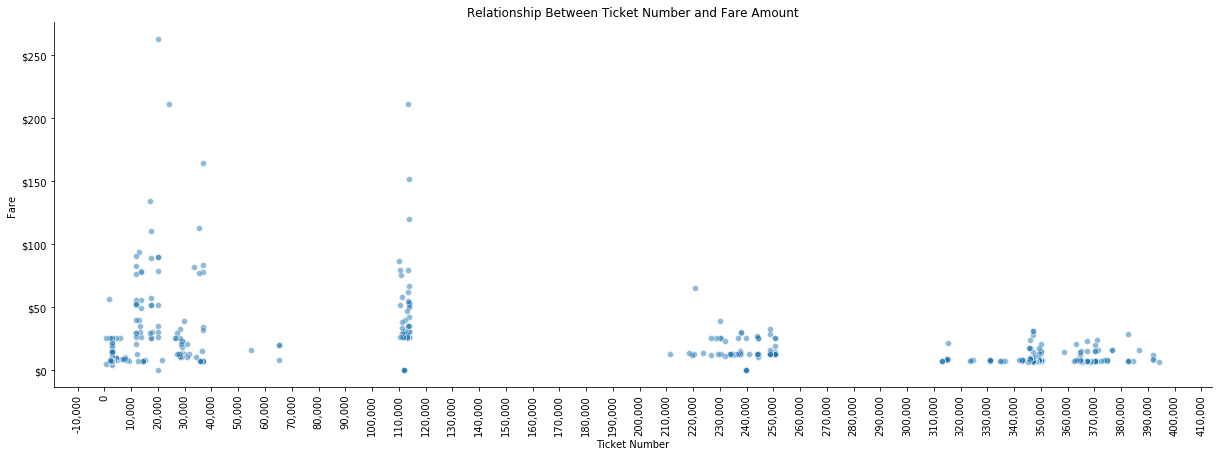

In [9]:
xformatter = ticker.FuncFormatter(lambda x, p: format(int(x), ','))
yformatter = ticker.FormatStrFormatter('$%1.0f')

# ----------------Scatterplot
fg = sns.relplot(data=tick3, x='ticket', y='fare', alpha=0.5)

# Labels
plt.title('Relationship Between Ticket Number and Fare Amount')
plt.xlabel('Ticket Number')
plt.ylabel('Fare')

# Set figure size and axis number formatting
fig = plt.gcf()
fig.set_size_inches(20, 6)
ax = plt.gca()
ax.xaxis.set_major_formatter(xformatter)
ax.xaxis.set_major_locator(plt.MultipleLocator(10000))
ax.yaxis.set_major_formatter(yformatter)
plt.xticks(rotation=90)

plt.show()

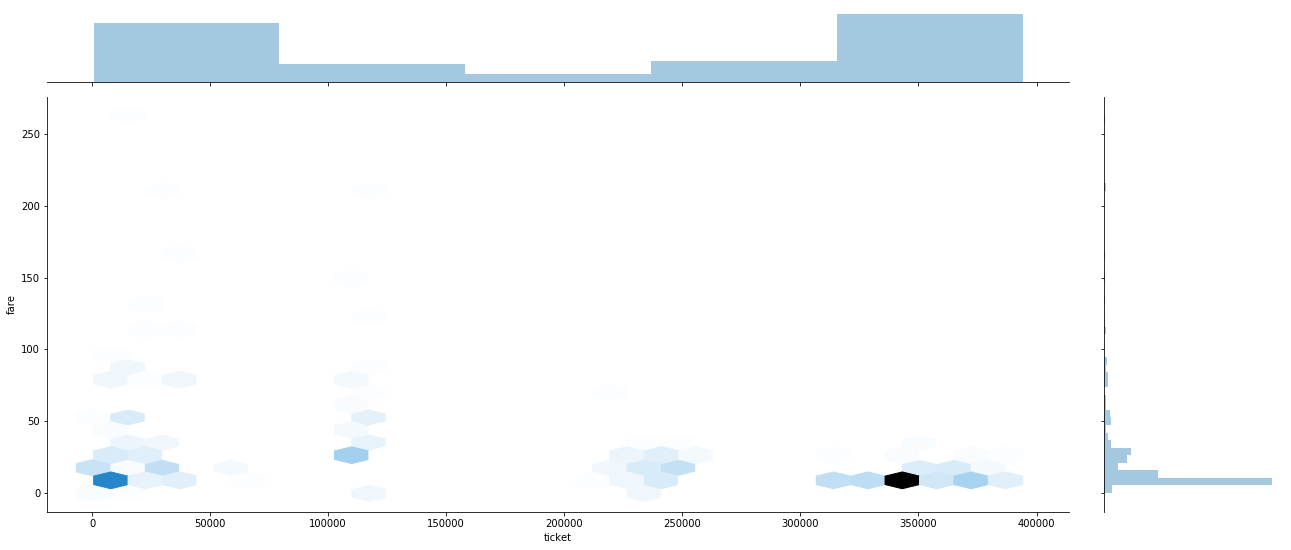

In [10]:
xformatter = ticker.FuncFormatter(lambda x, p: format(int(x), ','))

plot = sns.jointplot("ticket", "fare", data=tick3, kind="hex")
fig = plt.gcf()
fig.set_size_inches(20, 8)

plt.show()

In [88]:
# Splitting ticket numbers into groups based on above graphs
tick['fare_cat'] = np.nan
tick.loc[tick.ticket<10000, 'fare_cat'] = 0
tick.loc[(tick.ticket >= 10000) & (tick.ticket < 25000), 'fare_cat'] = 1
tick.loc[(tick.ticket >= 25000) & (tick.ticket < 35000), 'fare_cat'] = 2
tick.loc[(tick.ticket >= 35000) & (tick.ticket < 50000), 'fare_cat'] = 3
tick.loc[(tick.ticket >= 100000) & (tick.ticket < 120000), 'fare_cat'] = 4
tick.loc[(tick.ticket >= 210000) & (tick.ticket < 260000), 'fare_cat'] = 5
tick.loc[(tick.ticket >= 310000) & (tick.ticket < 355000), 'fare_cat'] = 6
tick.loc[(tick.ticket >= 355000) & (tick.ticket < 400000), 'fare_cat'] = 7
tick.loc[tick.ticket>=3000000, 'fare_cat'] = 8

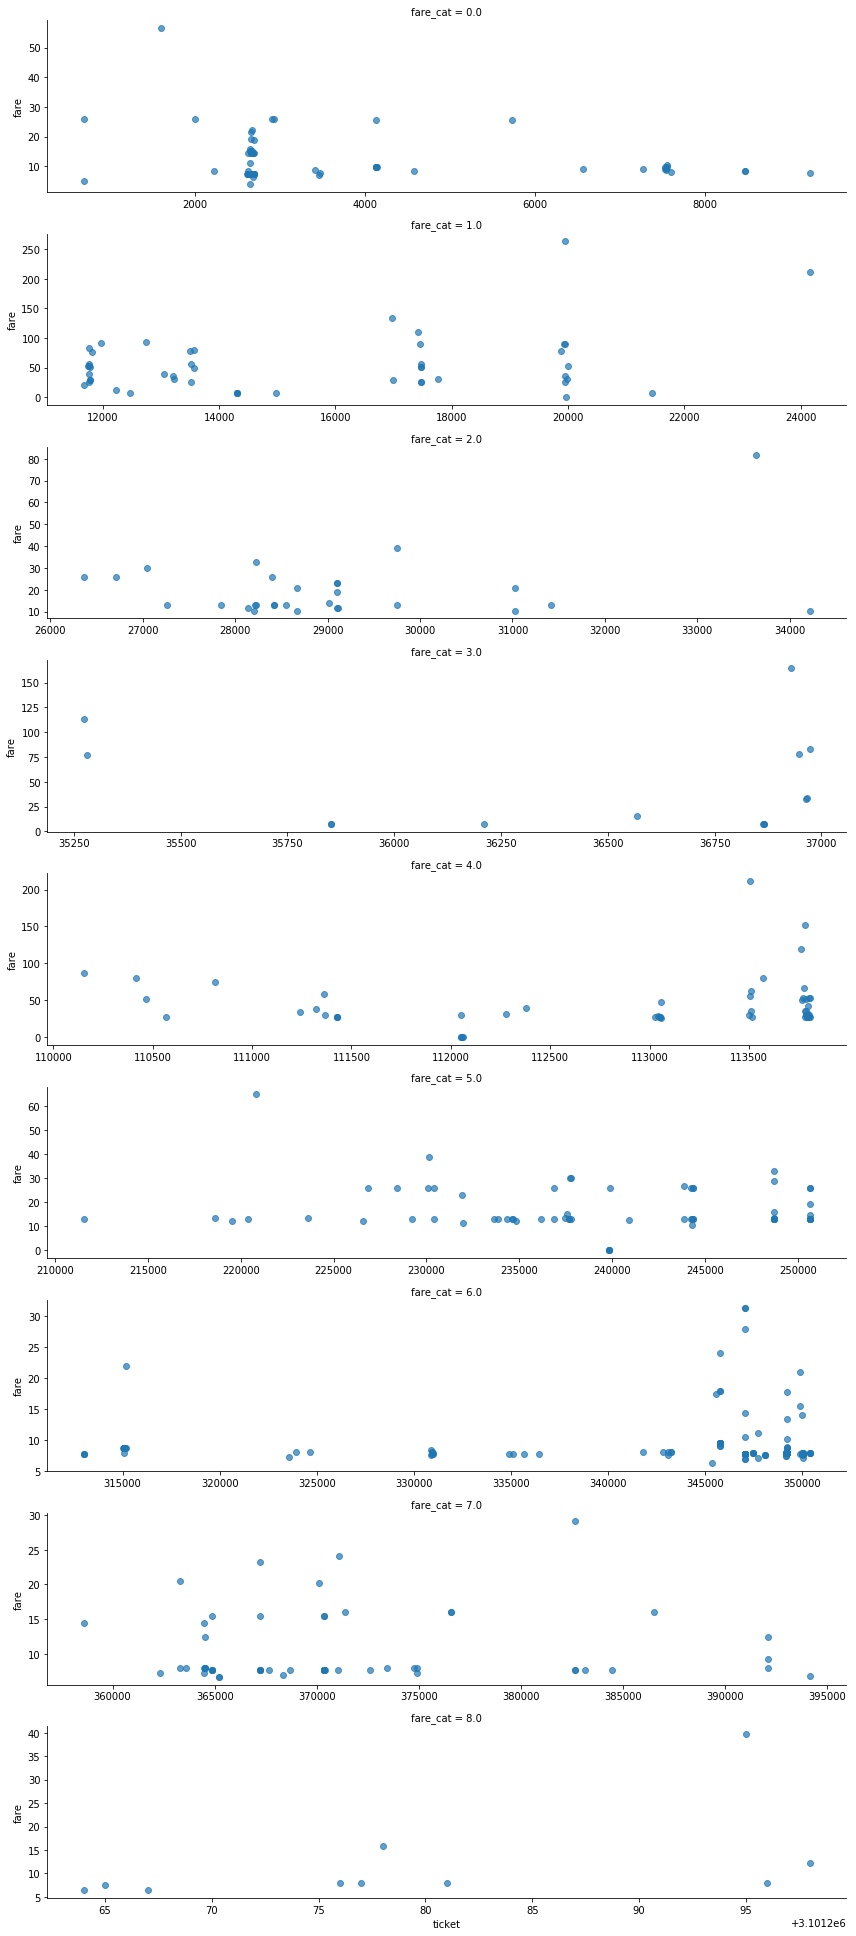

In [103]:
g = sns.FacetGrid(tick, row='fare_cat', sharex=False, sharey=False, height=3, aspect=4)
g.map(plt.scatter, 'ticket', 'fare', alpha=.7)

plt.show()

# How can I add titles to each plot?

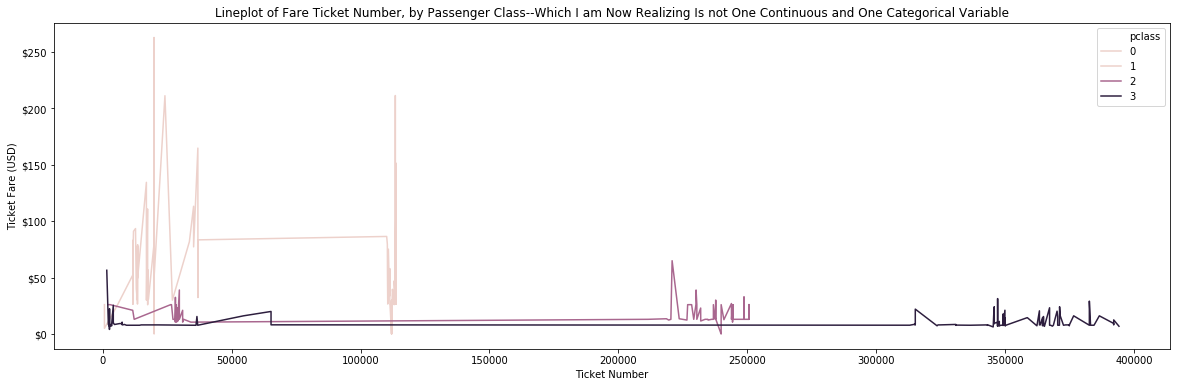

In [19]:
# --------------------Lineplot
g = sns.lineplot(data=tick3, x='ticket', y='fare', hue='pclass')

fig = plt.gcf()
fig.set_size_inches(20, 6)

plt.title('Lineplot of Fare Ticket Number, by Passenger Class--Which I am Now Realizing Is not One Continuous and One Categorical Variable')
plt.xlabel('Ticket Number')
plt.ylabel('Ticket Fare (USD)')

ax = plt.gca()
ax.yaxis.set_major_formatter(formatter)

plt.show()

### Reflection
The jointplot is an interesting take, but the most useful plot for my purposes was still the scatterplot. In part this is because ticket number and ticket price don't appear to be approximated cleanly by a function. If I included passenger class, or cleaned the data to reflect the per-person ticket price (some tickets are associated with multiple individuals) it's possible that the relationship would be cleaner.

## Section 3: Plotting one continuous variable (ticket fare) and one categorical variable (passenger class) six ways

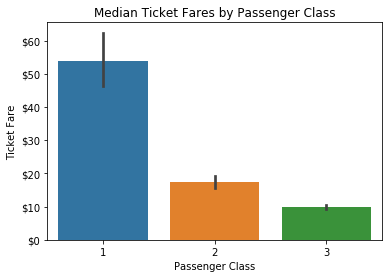

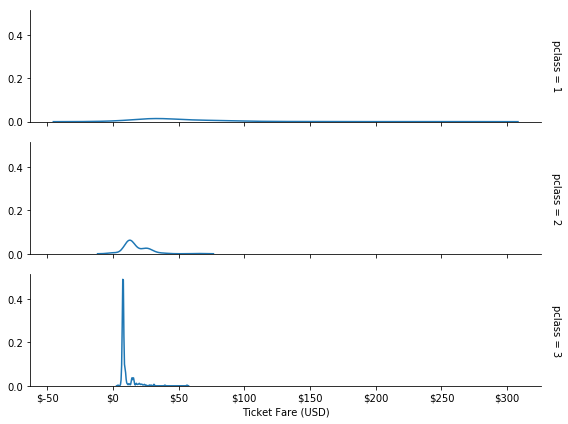

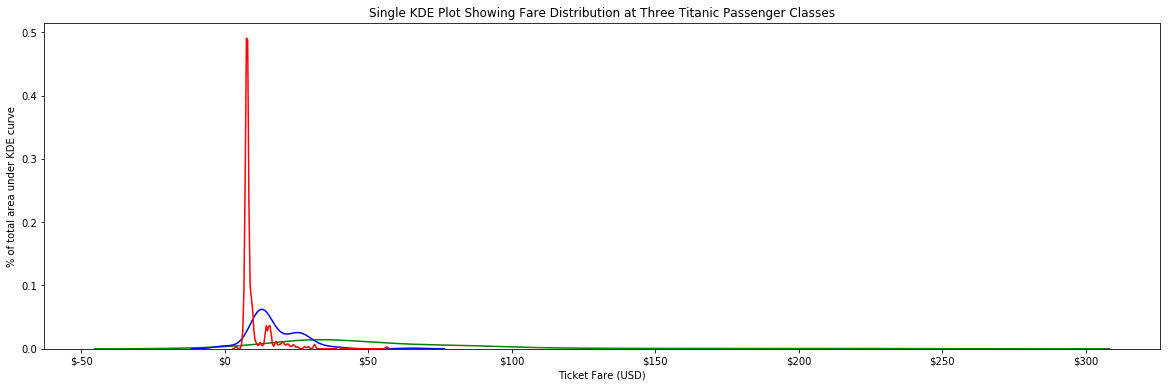

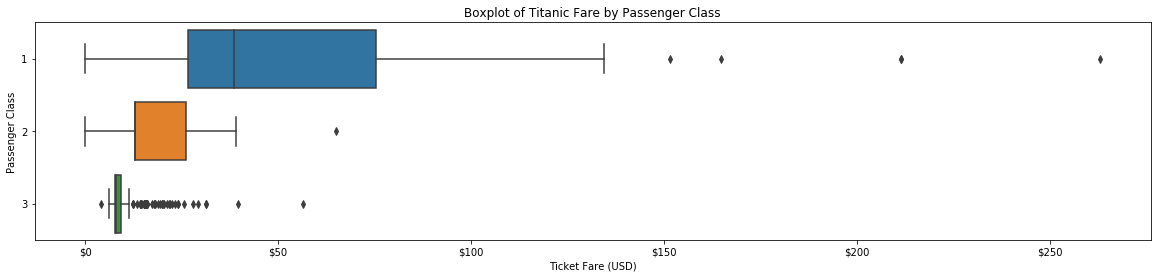

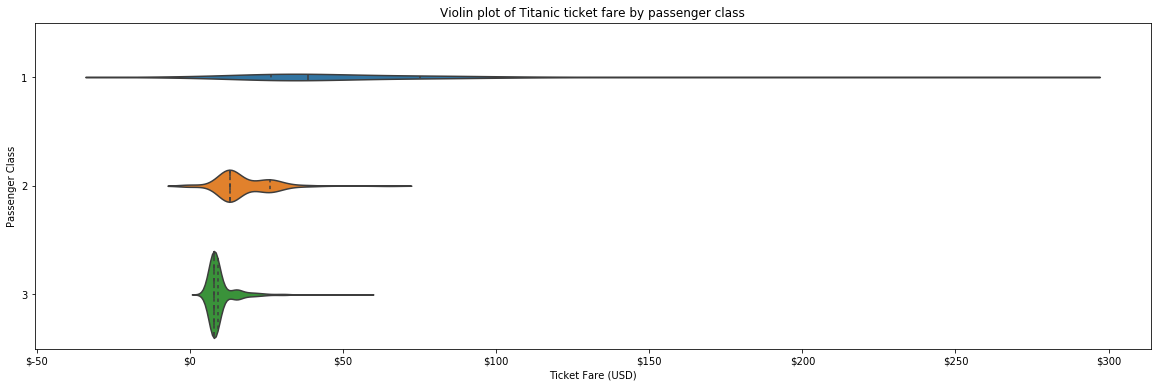

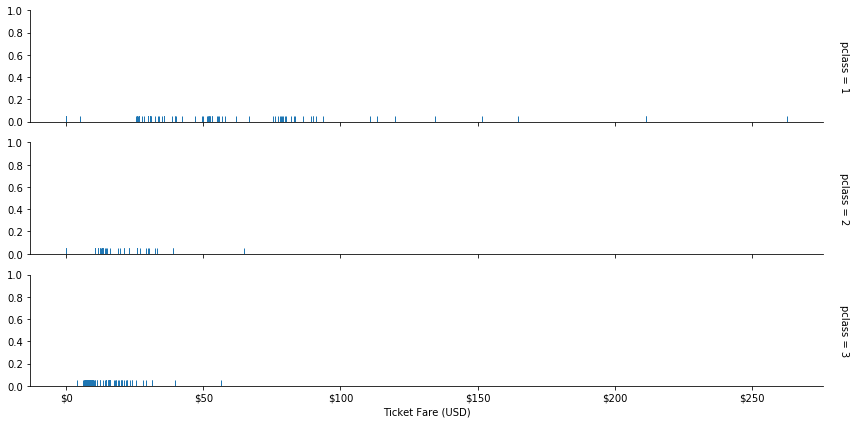

In [36]:
fare = tick[['pclass', 'fare']]
formatter = ticker.FormatStrFormatter('$%1.0f')

# -----------------Median barplots
sns.barplot(data=fare, x='pclass', y='fare')

plt.title('Median Ticket Fares by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Ticket Fare')

ax = plt.gca()
ax.yaxis.set_major_formatter(formatter)

plt.show()

# -----------------Multiple kernel density graphs
g = sns.FacetGrid(fare, row="pclass",margin_titles=True, height=2, aspect=4)
g.map(sns.kdeplot, 'fare')

ax = plt.gca()
ax.xaxis.set_major_formatter(formatter)
plt.xlabel('Ticket Fare (USD)')

plt.show()

# -----------------Multiple kernel density graphs
sns.distplot(fare.loc[fare['pclass']==1, 'fare'], hist=False, color='g')
sns.distplot(fare.loc[fare['pclass']==2, 'fare'], hist=False, color='b')
sns.distplot(fare.loc[fare['pclass']==3, 'fare'], hist=False, color='r')

plt.title('Single KDE Plot Showing Fare Distribution at Three Titanic Passenger Classes')
plt.xlabel('Ticket Fare (USD)')
plt.ylabel('% of total area under KDE curve')

ax = plt.gca()
ax.xaxis.set_major_formatter(formatter)

fig = plt.gcf()
fig.set_size_inches(20, 6)
plt.show()

# -----------------Single boxplot
g = sns.boxplot(data=fare, x='fare', y='pclass', orient='h')
fig = plt.gcf()
fig.set_size_inches(20, 4)

ax = plt.gca()
ax.xaxis.set_major_formatter(formatter)

plt.title('Boxplot of Titanic Fare by Passenger Class')
plt.xlabel('Ticket Fare (USD)')
plt.ylabel('Passenger Class')

plt.show()

# -----------------Single violin plot
g = sns.violinplot(data=fare, x='fare', y='pclass', orient='h', inner='quartile')
fig = plt.gcf()
fig.set_size_inches(20, 6)

ax = plt.gca()
ax.xaxis.set_major_formatter(formatter)

plt.title('Violin plot of Titanic ticket fare by passenger class')
plt.xlabel('Ticket Fare (USD)')
plt.ylabel('Passenger Class')
plt.show()

# -----------------Multiple rug plot
g = sns.FacetGrid(fare, row="pclass", margin_titles=True, height=2, aspect=6)
g.map(sns.rugplot, 'fare')

ax = plt.gca()
ax.xaxis.set_major_formatter(formatter)
plt.xlabel('Ticket Fare (USD)')

plt.show()